<hr/>

# Data Mining
**Tamás Budavári** - budavari@jhu.edu <br/>

- $k$-means clustering
- Gaussian mixtures

<hr/>

In [ ]:
%pylab inline

<h1><font color="darkblue">Clustering</font></h1>
<hr/>

## Statistical Learning

- The methods in general fall in these 4 categories

>|     Type       | Supervised     |         Unsupervised     |
 |----------------|:--------------:|:------------------------:|
 | **Discrete**   | Classification | Clustering               |   
 | **Continuous** | Regression     | Dimensionality Reduction |



## Clustering is ...
<img src="files/clusters.png" align=right width=200>

... the process of collecting a set of objects into groups or clusters of similar items

#### For example,

- Discover different species of birds based on their photographs
- Segment an image based on the pixel colors
- Organize news articles that cover the same story

<!--<img src="http://www.codeproject.com/KB/recipes/439890/clustering-process.png" width=450 align=left /> -->

## $k$-means clustering

A simple (flat) algorithm


In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans

In [ ]:
iris = datasets.load_iris()
X = iris.data[:,:2] 

figure(figsize=(10,4)); 
ax=subplot(131,aspect='equal')
scatter(X[:,0],X[:,1]);

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
C, L = kmeans.cluster_centers_, kmeans.labels_

ax=subplot(132,aspect='equal')
scatter(X[:,0],X[:,1],c=L,cmap=cm.rainbow);
scatter(C[:,0],C[:,1],c='k',marker='o',s=300,alpha=0.5,edgecolor='none');

if True:
    h = .005 # point in the mesh [x_min, m_max]x[y_min, y_max].
    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = 4, 8.5
    y_min, y_max = 1.5, 5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    P = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    P = P.reshape(xx.shape)

    # Put the result into a color plot
    ax=subplot(133,aspect='equal')
    plt.imshow(P, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='equal', origin='lower', alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=L, alpha=0.7, cmap=cm.rainbow)

## Limitations

- Initialization matters

> Rerun multiple times: **n_init** (default=10) <br/>
> Smart(er) starting points

- Assumes spherical clusters (use of distance function)

> Preprocessing becomes important even in simple cases <br>
> For example, whitening...

## What $k$?

- How many clusters?

> Too many? <br/>
> Too few?

- Various diagnostics

> Check the minimum value of the cost function? <br/>
> Characterize the clusters - Gaussian? spherical?



## Example

- Run $k$-means on this [CSV](files/Class-Clusters.csv) file
- Try different parameters
- How many clusters did you find?

In [ ]:
from scipy.stats import norm

In [ ]:
# Okay, you didn't see this because this generates the data
np.random.seed(seed=1)
x1 = norm.rvs(0, 0.99, size=(3, 66)); x1[0,:] += 2.1
x2 = norm.rvs(0, 0.99, size=(3, 67)); x2[1,:] += 2.1
x3 = norm.rvs(0, 0.99, size=(3, 67)); x3[2,:] += 6
X = hstack((x1,x2,x3)).T
#savetxt("files/Class-Clusters.csv", X, delimiter=","); del X

In [ ]:
#X = loadtxt('files/Class-Clusters.csv', delimiter=',')
scatter(X[:,0],X[:,1],s=50,alpha=0.3,edgecolor='none');
X.shape

In [ ]:
figure(figsize=(10,4))
for i,m,n in [(1,0,1),(2,1,2),(3,0,2)]:
    ax=subplot(1,3,i)
    scatter(X[:,m],X[:,n],alpha=0.3, edgecolor='none');

In [ ]:
klist = []
ilist = []
for k in range(1,7):
    kmeans = KMeans(n_clusters=k, copy_x=False)
    kmeans.fit(X)
    klist.append(k)
    ilist.append(kmeans.inertia_)
    if True:
        C, L = kmeans.cluster_centers_, kmeans.labels_
        figure(figsize=(10,4))
        for i,m,n in [(1,0,1),(2,1,2),(3,0,2)]:
            ax=subplot(1,3,i) #,aspect='equal')
            scatter(X[:,m],X[:,n],c=L,cmap=cm.rainbow, alpha=0.7, edgecolor='none');
            scatter(C[:,m],C[:,n],c='k',marker='o',s=200,alpha=0.4,edgecolor='none');
figure(); plot(klist,ilist,'o-');

## Gaussian Mixture Models

- A probabilistic approach to clustering

> Infer the parameters of $k$ **components**

- For example, a mixture of two Gaussians ($k\!=\!2$)

> **Parameters** $\boldsymbol{\theta}$ are $(\mu_1,\Sigma_1),\ (\mu_2,\Sigma_2)$ and the<br>
> cluster membership probabilities $\boldsymbol{\kappa}$ 


## GMM with $k=2$


- Difficult because of the unknown cluster memberships $\boldsymbol{\kappa}$

> $\kappa_i$ is the probability of that $x_i$ belongs to component 1 <br>
> $(1\!-\!\kappa_i)$ is the prob of belonging to component 2

- Likelihood function

>$\displaystyle L(\boldsymbol{\theta};\boldsymbol{x}) = \prod_{i=1}^n \Big[ \kappa_i\, G\left(x_i;\mu_1,\Sigma_1\right) + (1\!-\!\kappa_i)\, G\left(x_i; \mu_2,\Sigma_2\right)\Big]$

## Expectation-Maximization Algorithm

- The [EM algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm) is a general framework

>0. Create an initial model $\theta$
>0. Find a better $\theta'$ s.t. <br> 
> the likelihood improves: $p(D\mid\theta') > p(D\mid\theta)$ <br/> 
> (or the posterior)
>0. Repeat until convergence


## Step-by-step
<img src=http://orig02.deviantart.net/e551/f/2012/098/9/a/3_easy_steps_to_draw_mona_lisa____by_mcdaotri21-d4vhuu2.png align=left width=450>

## E-step

- Calculate the membership probabilities $\boldsymbol{\kappa}$

> Based on the current model $(\mu_1,\mu_2,\Sigma_1,\Sigma_2)$ and data $\boldsymbol{x}$

## M-step

- Maximize the likelihood function 

> Based on the estimated membership probabilities

- In spirit, this is not completely unlike $k$-means clustering algorithm

## Visual Example

<!--
<img src=https://upload.wikimedia.org/wikipedia/commons/6/69/EM_Clustering_of_Old_Faithful_data.gif align=left>
-->

<img src=https://upload.wikimedia.org/wikipedia/commons/a/a7/Em_old_faithful.gif align=left width=400>

## Iris

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn import datasets
from matplotlib.patches import Ellipse

In [ ]:
iris = datasets.load_iris()
X = iris.data[:,:2] # only 2 features

gmm = GaussianMixture(n_components=2)
gmm.fit(X)
Cpred = gmm.predict(X)

ax = subplot(111, aspect='equal')
scatter(X[:,0], X[:,1], c=Cpred, cmap=cm.rainbow, alpha=0.7)

for n in arange(gmm.n_components): 
    cov = gmm.covariances_[n][:2,:2] 
    v, w = np.linalg.eigh(cov)
    angle = 180/pi * arctan2(w[0,1],w[0,0])
    for i in range(1,4): # of contours
        a = 2*i*np.sqrt(v) 
        ell = Ellipse(gmm.means_[n,:2], a[0],a[1], angle)
        ell.set_alpha(0.1)
        ax.add_artist(ell)

In [ ]:
# cluster on all features w/ plotting another projection
X = iris.data[:,:] 

gmm = GaussianMixture(n_components=3)
gmm.fit(X)
Cpred = gmm.predict(X)

ax = subplot(111, aspect='equal')
if True: # coloring by the true class memberships
    scatter(X[:,2], X[:,3], c=iris.target, cmap=cm.rainbow, alpha=0.7) 
else:
    scatter(X[:,2], X[:,3], c=Cpred, cmap=cm.rainbow, alpha=0.7) 
    
for n in arange(gmm.n_components): 
    cov = gmm.covariances_[n][2:,2:] 
    v, w = np.linalg.eigh(cov)
    angle = 180/pi * arctan2(w[0,1],w[0,0])
    for i in range(1,4): # of contours
        a = 2*i*np.sqrt(v) 
        ell = Ellipse(gmm.means_[n,2:], a[0],a[1], angle)
        ell.set_alpha(0.1)
        ax.add_artist(ell)

In [ ]:
gmm.covariances_[0].shape

In [ ]:
gmm.predict(X)[:5]

In [ ]:
gmm.predict_proba(X)[:5]

## What Gaussian?

In [ ]:
X = iris.data[:,:2]
ax = subplot(111, aspect='equal')
scatter(X[:,0], X[:,1], c=iris.target, cmap=cm.rainbow, alpha=0.7)

gmm = GaussianMixture(n_components=3, covariance_type='tied')
gmm.fit(X)

for n in arange(gmm.n_components): 
    if gmm.covariance_type == 'spherical': cov = eye(X.shape[1])*gmm.covariances_[n]
    elif gmm.covariance_type == 'full': cov = gmm.covariances_[n][:2, :2]
    elif gmm.covariance_type == 'tied': cov = gmm.covariances_[:2, :2]
    elif gmm.covariance_type == 'diag': cov = diag(gmm.covariances_[n][:2])
    v, w = np.linalg.eigh(cov)
    angle = 180/pi * arctan2(w[0,1],w[0,0])
    for i in range(1,3):
        a = 2*i*np.sqrt(v) 
        ell = Ellipse(gmm.means_[n,:2], a[0],a[1], angle)
        ell.set_alpha(0.1)
        ax.add_artist(ell)

## Decision Boundaries

In [ ]:
X = iris.data[:,:2] # only 2 features

gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(X)
C = gmm.means_

figure(figsize=(10,4)); 
ax=subplot(131,aspect='equal')
scatter(X[:,0],X[:,1], alpha=0.5);

ax=subplot(132,aspect='equal')
scatter(X[:,0],X[:,1],c=iris.target,cmap=cm.rainbow, alpha=0.5);
scatter(C[:,0],C[:,1],c='k',marker='o',s=100,alpha=0.5,edgecolor='none');

if True:
    h = .005 # point in the mesh [x_min, m_max]x[y_min, y_max].
    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = 4, 8.5
    y_min, y_max = 1.5, 5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    P = gmm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Put the result into a color plot
    ax=subplot(133,aspect='equal')
    plt.imshow(P, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='equal', origin='lower', alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=gmm.predict(X), alpha=0.7, cmap=cm.Spectral_r)

## Variants

<img src=http://scikit-learn.org/stable/_images/sphx_glr_plot_gmm_covariances_0011.png align=left width=400>

<!--<img src=files/plot_gmm_classifier_0011.png align=left width=400>-->


## Comparison

- Gaussian Mixture Model

> Find components with matching distribution

- $k$-means clustering

> Tends to yield spherical clusters with similar sizes

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/ClusterAnalysis_Mouse.svg/675px-ClusterAnalysis_Mouse.svg.png" width=600 align=left>

In [ ]:
gmm.predict(X[:3])

In [ ]:
gmm.predict_proba(X[:3])

In [ ]:
gmm.score(X)

## Soft Clustering?

- GMM provides quality to each possible cluster membership

> Instead of just in/out, have the likelihoods for all


## More Clustering

- Read and learn about the following algorithms:

> [Agglomerative clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)

> [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN)

- Overview of clustering on sklearn

> Read more [here](http://scikit-learn.org/stable/modules/clustering.html)

## Next Topic

- Spectral Clustering!

<h1><font color="darkblue">Summary of Gaussian Mixture Model</font></h1>
<hr/>

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

### Intuition

- Infer the parameters of $ k $ components

- For example, a mixture of two Gaussians ($ k = 2 $)

> $ \displaystyle \qquad f(x) = \pi_1 \cdot \frac{1}{\sqrt{2 \pi} \sigma_1} \exp\left[-\frac{(x-\mu_1)^2}{2 \sigma_1^2}\right] + (1-\pi_1) \cdot \frac{1}{\sqrt{2 \pi} \sigma_2} \exp\left[-\frac{(x-\mu_2)^2}{2 \sigma_2^2}\right] $

> $ \displaystyle \qquad g(x) = \frac{3}{5} \cdot \frac{1}{\sqrt{2 \pi}} \exp\left[-\frac{(x-4)^2}{2}\right] + \frac{2}{5} \cdot \frac{1}{\sqrt{2 \pi}} \exp\left[-\frac{(x-6)^2}{2}\right] $

### Mathematically

- Maximize likelihood function (e.g. $ k = 2 $)
> $ \displaystyle L(\mathbf{x}; \mathbf{\theta}) = \prod_{i=1}^n \Big[ \kappa_i\, f \left(x_i;\mu_1,\Sigma_1 \right) + (1-\kappa_i)\, f \left(x_i; \mu_2,\Sigma_2 \right) \Big] \quad $ where $ \displaystyle \quad \kappa_i = \mathbb{P}[x_i \  \in \  \text{component}_1] $

- Expectation-Maximization Algorithm
> 0. Start with initial model $ \theta $
> 0. Update $ \theta = \theta_{new} \  $ if $ \ L(\mathbf{x}; \mathbf{\theta_{new}}) > L(\mathbf{x}; \mathbf{\theta}) $
> 0. Repeat until convergence

### Procedure

- E-step
> Calculate $ \  \mathbf{\kappa} \ $ based on the current model $ \theta \  $ and data $ \ \mathbf{x} $

- M-step
> Maximize the likelihood function based on the estimated $ \  \mathbf{\kappa} \ $

### Example

In [14]:
# Generate data
n_samples = 1500
random_state = 2018
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)

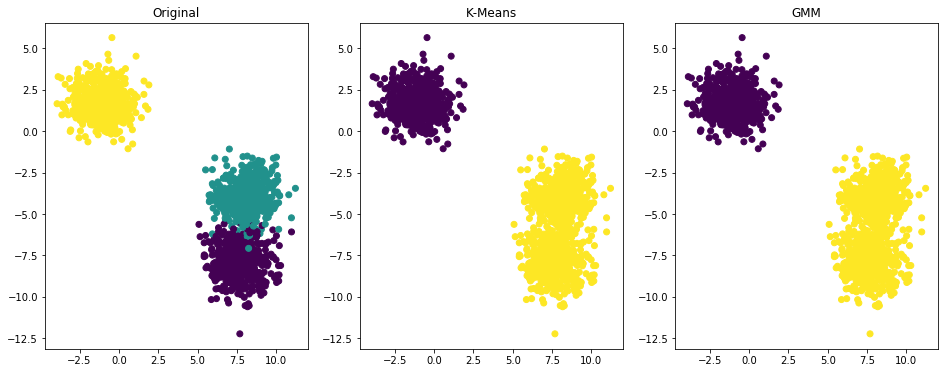

In [15]:
# Incorrect number of clusters
c11 = KMeans(n_clusters=2, random_state=2018).fit_predict(X)
c12 = GaussianMixture(n_components=2, covariance_type='full', random_state=2018).fit(X).predict(X)

figure(figsize=(16, 6))
subplot(131);
title('Original');
scatter(X[:,0], X[:,1], c=y);
subplot(132);
title('K-Means');
scatter(X[:,0], X[:,1], c=c11);
subplot(133);
title('GMM');
scatter(X[:,0], X[:,1], c=c12);

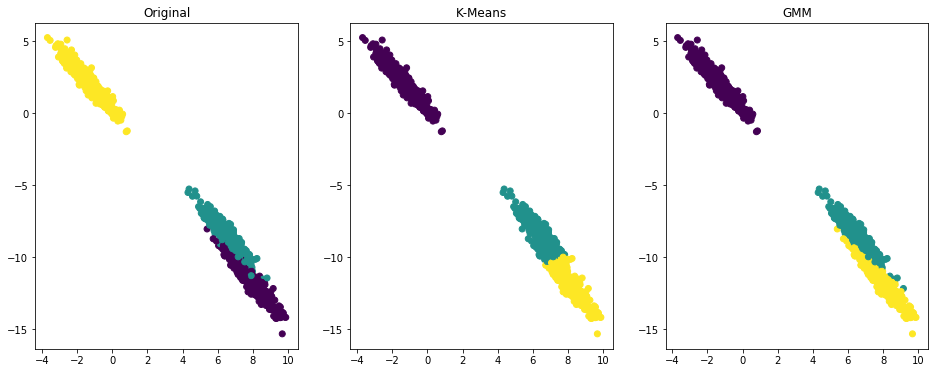

In [16]:
# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X2 = np.dot(X, transformation)
c21 = KMeans(n_clusters=3, random_state=random_state).fit_predict(X2)
# All components share the same general covariance matrix
c22 = GaussianMixture(n_components=3, covariance_type='tied', random_state=2018).fit(X2).predict(X2)

figure(figsize=(16, 6))
subplot(131);
title('Original');
scatter(X2[:,0], X2[:,1], c=y);
subplot(132);
title('K-Means');
scatter(X2[:,0], X2[:,1], c=c21);
subplot(133);
title('GMM');
scatter(X2[:,0], X2[:,1], c=c22);

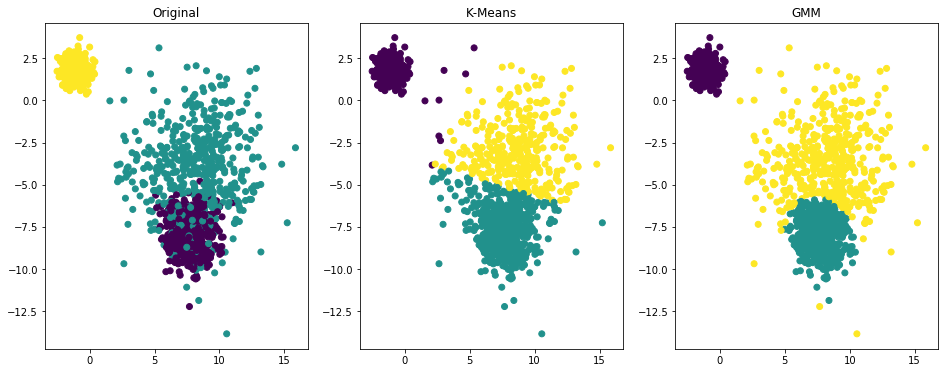

In [18]:
# Different variance
X3, y3 = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
c31 = KMeans(n_clusters=3, random_state=random_state).fit_predict(X3)
# Each component has its own diagonal covariance matrix
c32 = GaussianMixture(n_components=3, covariance_type='full', random_state=2018).fit(X3).predict(X3)

figure(figsize=(16, 6))
subplot(131);
title('Original');
scatter(X3[:,0], X3[:,1], c=y3);
subplot(132);
title('K-Means');
scatter(X3[:,0], X3[:,1], c=c31);
subplot(133);
title('GMM');
scatter(X3[:,0], X3[:,1], c=c32);

- **Note:** For `GaussianMixture` in scikit-learn, `covariance_type` could be

> 'full' (each component has its own general covariance matrix)
>
> 'tied' (all components share the same general covariance matrix)
>
> 'diag' (each component has its own diagonal covariance matrix)
>
> 'spherical' (each component has its own single variance)

[References](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)